# Demo of Gradient Descent with Vectorized Neural Network

In [9]:
%matplotlib inline

# this module
from autograd.engine import Tensor
from autograd.nn import MLP

# extra helpers
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

making the model:

In [7]:
nn = MLP(3, [4, 4, 1], acts=['relu', 'relu', None])
print(nn)

MLP of 3: 
 - In: Layer: relu, 4 neurons
 - Layer: relu, 4 neurons
 - Layer: linear, 1 neurons


creating some fake data:

In [8]:
xs = np.array([
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]).T

ys = np.array([1.0, -1.0, -1.0, 1.0]).reshape(1,4) # desired targets

training:

In [10]:
learning_rate=0.01; n_iter=100
y_pred = None
loss = None

losses = []

with trange(n_iter) as t:
    for i in t:
        y_pred = nn.forward(xs)
        loss = ((y_pred - ys)**2).sum()
        losses.append(loss.data.item())
        
        nn.zero_grad()
        loss.backward()
    
        for p in nn.parameters():
            p.data = p.data - (learning_rate * p.grad)

        t.set_postfix_str(s=f"loss={loss.data.item()}")
        print(f"Iteration {i}: loss of {loss.data.item():.5f}")

  0%|          | 0/100 [00:00<?, ?it/s]

Iteration 0: loss of 15.55510
Iteration 1: loss of 780.37601
Iteration 2: loss of 5.21150
Iteration 3: loss of 4.76512
Iteration 4: loss of 4.41884
Iteration 5: loss of 4.14036
Iteration 6: loss of 3.90846
Iteration 7: loss of 3.70911
Iteration 8: loss of 3.53302
Iteration 9: loss of 3.37398
Iteration 10: loss of 3.22785
Iteration 11: loss of 3.09185
Iteration 12: loss of 2.96406
Iteration 13: loss of 2.84320
Iteration 14: loss of 2.72833
Iteration 15: loss of 2.61880
Iteration 16: loss of 2.51413
Iteration 17: loss of 2.41393
Iteration 18: loss of 2.31793
Iteration 19: loss of 2.22587
Iteration 20: loss of 2.13755
Iteration 21: loss of 2.05279
Iteration 22: loss of 1.97143
Iteration 23: loss of 1.89331
Iteration 24: loss of 1.81830
Iteration 25: loss of 1.74628
Iteration 26: loss of 1.67711
Iteration 27: loss of 1.61069
Iteration 28: loss of 1.54690
Iteration 29: loss of 1.48564
Iteration 30: loss of 1.42681
Iteration 31: loss of 1.37030
Iteration 32: loss of 1.31604
Iteration 33: los

see how close the model's output is below? we learned the trends!

In [12]:
print(y_pred)
print(ys)

[[ 0.79651017 -0.86467392 -1.          0.83239233]]
[[ 1. -1. -1.  1.]]


we can also visualize this phenomena:

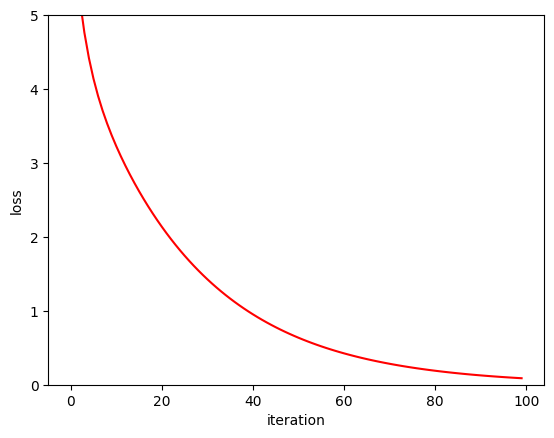

In [14]:
plt.plot(range(n_iter), losses, c='red')
plt.ylabel('loss'); plt.xlabel('iteration')
plt.ylim(0,5)
plt.show()

# A Slightly Larger Example

make data:

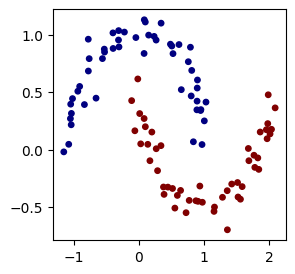

In [58]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=y, s=15, cmap='jet')

X = X.T
y = y.reshape(-1,1).T

build neural network:

In [59]:
nn = MLP(2, [4, 4, 1], ['relu', 'relu', None])
print(nn)

MLP of 3: 
 - In: Layer: relu, 4 neurons
 - Layer: relu, 4 neurons
 - Layer: linear, 1 neurons


In [60]:
learning_rate=0.01; n_iter=100
y_pred = None
loss = None

losses = []

with trange(n_iter) as t:
    for i in t:
        y_pred = nn.forward(X)
        loss = ((y_pred - y)**2).sum()
        losses.append(loss.data.item())
        
        nn.zero_grad()
        loss.backward()
    
        for p in nn.parameters():
            p.data = p.data - (learning_rate * p.grad)
            
        t.set_description(desc=f"loss={loss.data.item():.5f} ")

  0%|          | 0/100 [00:00<?, ?it/s]

again we can visualize the improvement of our loss:

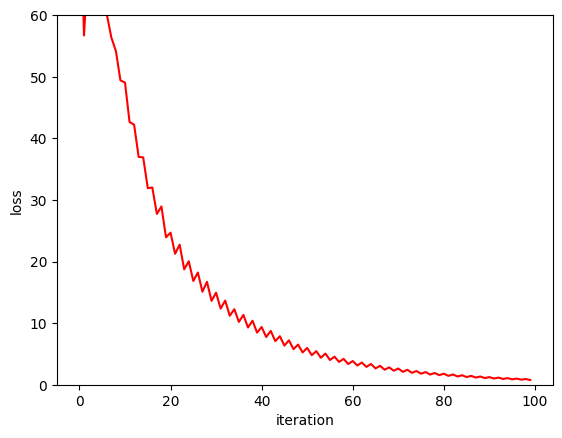

In [61]:
plt.plot(range(n_iter), losses, c='red')
plt.ylabel('loss'); plt.xlabel('iteration')
plt.ylim(0,60)
plt.show()